In [106]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [108]:
! kaggle datasets download -d brendan45774/test-file

test-file.zip: Skipping, found more recently modified local copy (use --force to force download)


In [109]:
! unzip test-file.zip

Archive:  test-file.zip
replace tested.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [110]:
df = pd.read_csv('tested.csv')

In [111]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [112]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [113]:
df.shape

(418, 12)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [115]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: >

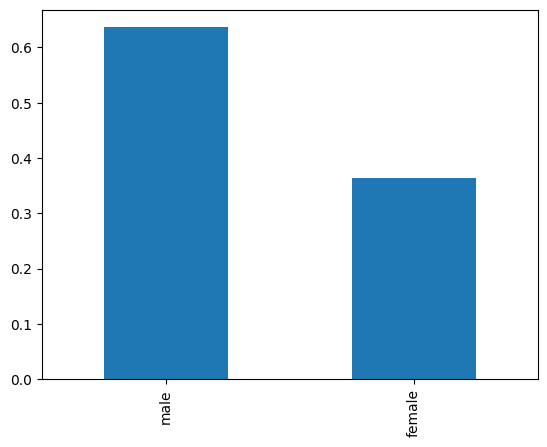

In [116]:
df['Sex'].value_counts(normalize=True).plot(kind='bar')

<Axes: >

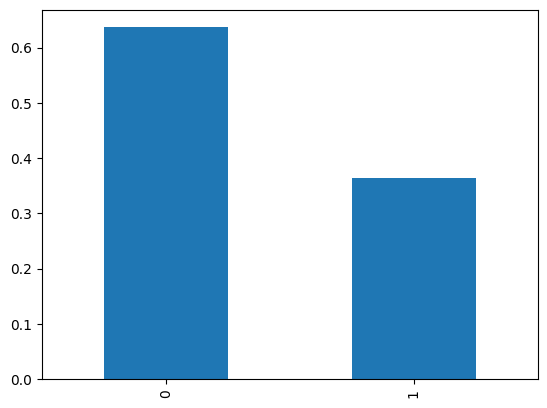

In [117]:
df['Survived'].value_counts(normalize=True).plot(kind='bar')

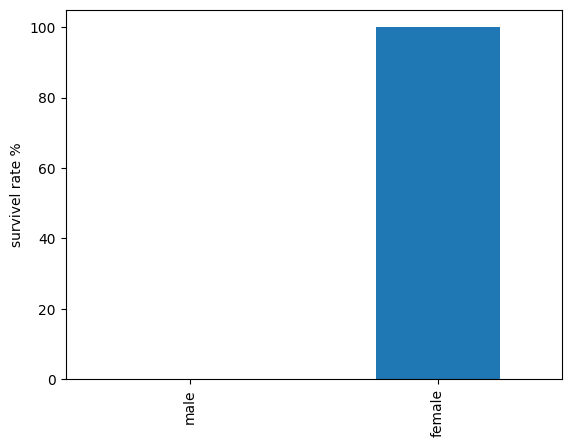

In [118]:
unique_values = df['Sex'].unique()
percentages = {}
for value in unique_values:
  subset = df[df['Sex'] == value]
  survived_count = subset['Survived'].sum()
  total_count = len(subset)
  if total_count >0:
    percentage = (survived_count/total_count)* 100
    percentages[value] =percentage

pd.Series(percentages).plot(kind='bar')
plt.ylabel('survivel rate %');

In [119]:
df['Age'].isna().sum()

86

In [120]:
df['Cabin'].isna().sum()

327

In [121]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
# Preproccesing

In [123]:
df = df.drop(columns=['PassengerId','Name','Cabin'])

In [124]:
df['Age'].mean()

30.272590361445783

In [125]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [126]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [127]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [128]:
df['Embarked'] = df['Embarked'].replace({'Q':0,'S':1,'C':2})

In [129]:
df['Sex'] = df['Sex'].replace({'male':0,'female':1})

In [130]:
df['Ticket'].nunique()

363

In [131]:
df.drop(columns='Ticket',inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


# Model

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
target = 'Survived'
X = df.drop(columns=target)
y = df[target]

In [135]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=46)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((334, 7), (84, 7), (334,), (84,))

In [136]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [137]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [138]:
y_pred_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [139]:
y_test

177    0
124    0
273    1
185    0
284    1
      ..
84     0
81     0
225    1
388    0
19     1
Name: Survived, Length: 84, dtype: int64

## Evaluation

In [140]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report

In [141]:
# Train
print(f'accuracy_score = {accuracy_score(y_train,y_pred_train)}')
print(f'recall_score = {recall_score(y_train,y_pred_train)}')
print(f'precision_score = {precision_score(y_train,y_pred_train)}')
print(f'classification_report = {classification_report(y_train,y_pred_train)}')


accuracy_score = 1.0
recall_score = 1.0
precision_score = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



In [142]:
# Train
print(f'accuracy_score = {accuracy_score(y_train,y_pred_train)}')
print(f'recall_score = {recall_score(y_train,y_pred_train)}')
print(f'precision_score = {precision_score(y_train,y_pred_train)}')
print(f'classification_report = {classification_report(y_train,y_pred_train)}')


# Test
print(f'accuracy_score = {accuracy_score(y_test,y_pred_test)}')
print(f'recall_score = {recall_score(y_test,y_pred_test)}')
print(f'precision_score = {precision_score(y_test,y_pred_test)}')
print(f'classification_report = {classification_report(y_test,y_pred_test)}')

accuracy_score = 1.0
recall_score = 1.0
precision_score = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       125

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334

accuracy_score = 1.0
recall_score = 1.0
precision_score = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        27

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [143]:
# Communicate the results

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

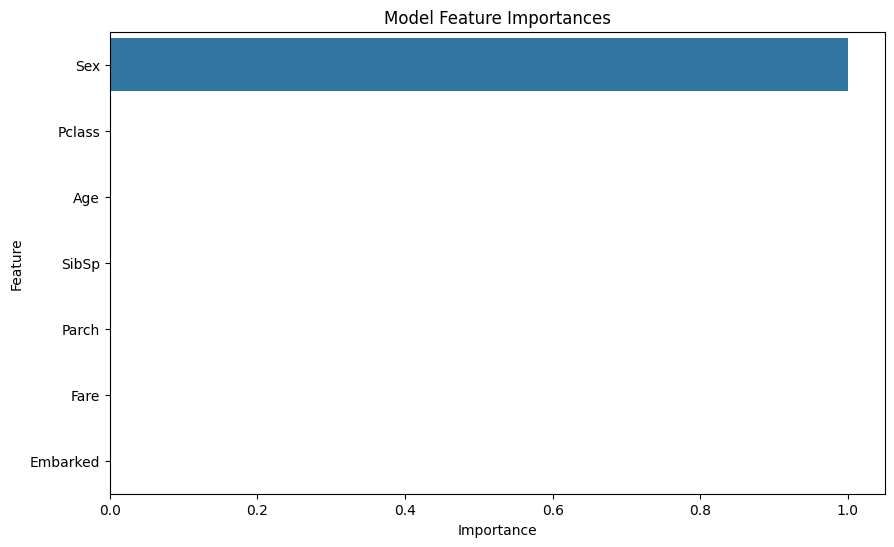

In [145]:
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Model Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [146]:
from sklearn.tree import plot_tree

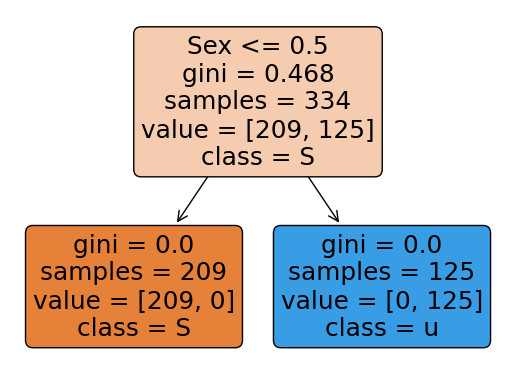

In [147]:
# Tree plot
plot_tree(model, feature_names=X.columns, class_names='Survived', filled=True, rounded=True)
plt.show()

In [148]:
def pred_fun(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked,model):
  input= [[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]]
  pred = model.predict(input)
  return pred

In [149]:
pred_fun(Pclass=3,	Sex=0,	Age=34.5,	SibSp=0,	Parch=0,	Fare=330911,	Embarked=7.8292,model=model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

# Credit Card Fraud Detection

In [150]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [151]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [152]:
! unzip /content/creditcardfraud.zip


Archive:  /content/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [153]:
import pandas as pd

In [154]:
df = pd.read_csv('/content/creditcard.csv')

In [155]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [156]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [157]:
df.shape

(284807, 31)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [159]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [160]:
df.duplicated().sum()

1081

In [161]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

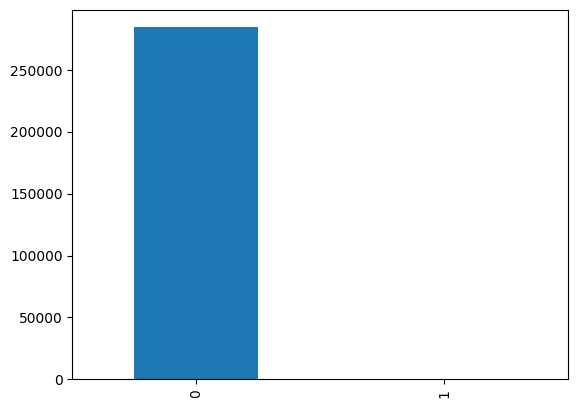

In [162]:
df['Class'].value_counts().plot(kind='bar')

In [163]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

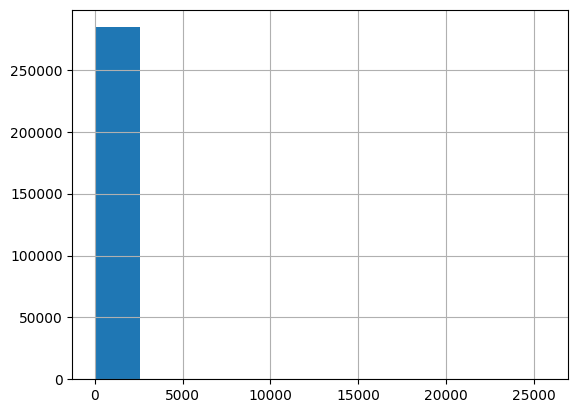

In [164]:
df['Amount'].hist()

<Axes: >

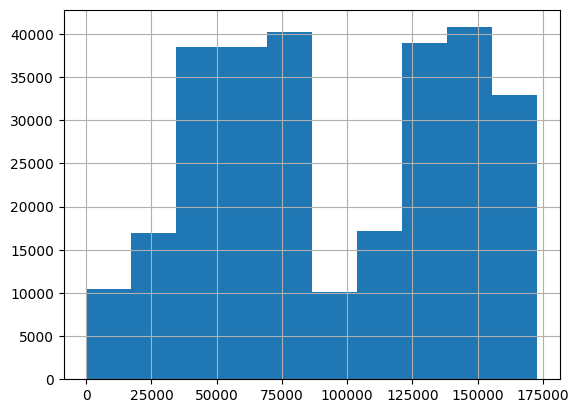

In [165]:
df['Time'].hist()


# Preprocessing

In [166]:
from imblearn.over_sampling import RandomOverSampler

In [167]:
ROS = RandomOverSampler()

In [168]:
target = 'Class'
X = df.drop(columns = target)
y = df[target]

In [169]:
X, y = ROS.fit_resample(X,y)

In [170]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((454904, 30), (113726, 30), (454904,), (113726,))

# Model



In [171]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [172]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

## Evaluation

In [173]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report, ConfusionMatrixDisplay

In [174]:
# Train
print(f'accuracy_score = {accuracy_score(y_train,y_pred_train)}')
print(f'recall_score = {recall_score(y_train,y_pred_train)}')
print(f'precision_score = {precision_score(y_train,y_pred_train)}')
print(f'classification_report = {classification_report(y_train,y_pred_train)}')


accuracy_score = 1.0
recall_score = 1.0
precision_score = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227564
           1       1.00      1.00      1.00    227340

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904



In [175]:


# Test
print(f'accuracy_score = {accuracy_score(y_test,y_pred_test)}')
print(f'recall_score = {recall_score(y_test,y_pred_test)}')
print(f'precision_score = {precision_score(y_test,y_pred_test)}')
print(f'classification_report = {classification_report(y_test,y_pred_test)}')

accuracy_score = 0.9999472416158135
recall_score = 1.0
precision_score = 0.9998947017426861
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56751
           1       1.00      1.00      1.00     56975

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



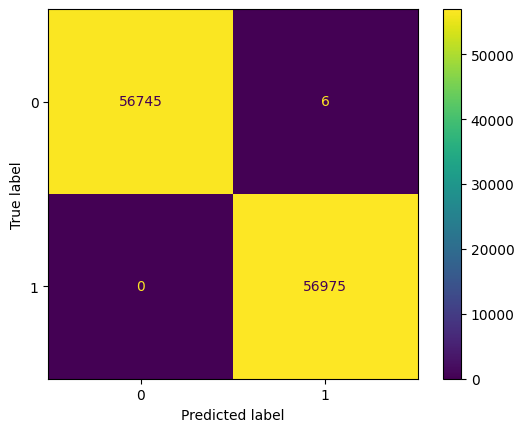

In [176]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

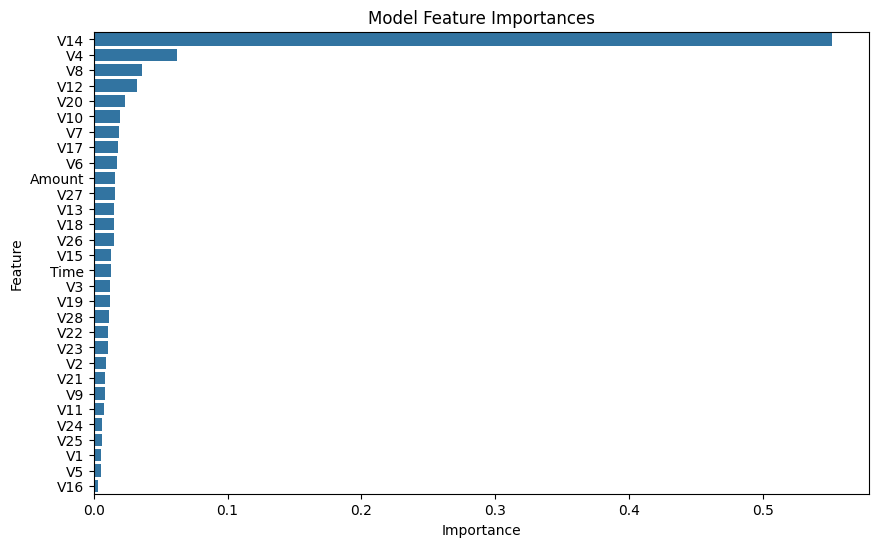

In [178]:
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Model Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [179]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [180]:
def pred_fun(Time, V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,model):
  input= [[Time, V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount]]
  pred = model.predict(input)
  return pred

In [181]:
pred_fun(Time=406, V1=-2.31227,V2=1.951992,V3=-1.609,V4=3.9979,V5=-0.522188,V6=-1.426545,V7=-2.537387,V8= 1.391657,V9=-2.770089,V10=-2.772272,V11= 3.202033,
          V12= -2.899907,V13=-0.595222,V14=-3.289254,V15=-2.389724,V16=-4.140747,V17= -2.830056,V18=-0.016822,V19=0.416956,V20= 0.126911,V21=0.517232,V22=-0.035049,
          V23=-0.465211,V24=0.320198,V25=0.044519,V26=0.177840,V27=0.261145,V28=-0.143276,Amount=0
          ,model=model)

array([1])

In [182]:
df.iloc[541]

Time      406.000000
V1         -2.312227
V2          1.951992
V3         -1.609851
V4          3.997906
V5         -0.522188
V6         -1.426545
V7         -2.537387
V8          1.391657
V9         -2.770089
V10        -2.772272
V11         3.202033
V12        -2.899907
V13        -0.595222
V14        -4.289254
V15         0.389724
V16        -1.140747
V17        -2.830056
V18        -0.016822
V19         0.416956
V20         0.126911
V21         0.517232
V22        -0.035049
V23        -0.465211
V24         0.320198
V25         0.044519
V26         0.177840
V27         0.261145
V28        -0.143276
Amount      0.000000
Class       1.000000
Name: 541, dtype: float64

# Regression

# House Price Prediction

In [183]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [184]:
! kaggle datasets download -d shree1992/housedata

housedata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [185]:
! unzip /content/housedata.zip

Archive:  /content/housedata.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [186]:
import pandas as pd

In [187]:
df = pd.read_csv("/content/data.csv")

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [189]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [190]:
df['country'].unique()

array(['USA'], dtype=object)

In [191]:
df['city'].nunique()

44

In [192]:
df['street'].nunique()


4525

In [193]:
df['statezip'].nunique()

77

In [194]:
df.shape

(4600, 18)

In [195]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [196]:
from scipy import stats
def remove_outliers(df, columns):
    df_cleaned = df.copy()

    for column in columns:
        # Calculate Z-scores
        z_scores = stats.zscore(df_cleaned[column])
        # Set a threshold (3) beyond which data points are considered outliers
        threshold = 3
        # Remove outliers
        df_cleaned = df_cleaned[(z_scores < threshold) & (z_scores > -threshold)]

    return df_cleaned
columns_to_remove_outliers = ['sqft_basement','sqft_above','sqft_living','sqft_lot','price']
df = remove_outliers(df, columns_to_remove_outliers)
print(df.shape)

(4384, 18)


In [197]:
# Drop Columns "Street"
df.drop(columns='street',inplace=True)

In [198]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [199]:
#city	statezip	country
df['city'] = label_encoder.fit_transform(df['city'])
df['statezip'] = label_encoder.fit_transform(df['statezip'])
df['country'] = label_encoder.fit_transform(df['country'])

In [200]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,62,0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,26,0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,7,0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31,0
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,35,54,0


In [201]:
df['date']

0       2014-05-02 00:00:00
2       2014-05-02 00:00:00
3       2014-05-02 00:00:00
4       2014-05-02 00:00:00
5       2014-05-02 00:00:00
               ...         
4595    2014-07-09 00:00:00
4596    2014-07-09 00:00:00
4597    2014-07-09 00:00:00
4598    2014-07-10 00:00:00
4599    2014-07-10 00:00:00
Name: date, Length: 4384, dtype: object

In [202]:
df['date'] = pd.to_datetime(df['date'])

In [203]:
df.drop(columns='date',inplace=True)

In [204]:
df.duplicated().sum()

0

### Model

In [205]:
target = 'price'
X = df.drop(columns=target)
y = df[target]

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3507, 15), (877, 15), (3507,), (877,))

### BASELINE MODEL

In [208]:
from sklearn.metrics import mean_absolute_error
y_pred_avg = [ df['price'].mean() ] * len(df)
mean_absolute_error(y,y_pred_avg)

204256.04554597568

## LINEAR REGRESSION

In [209]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [210]:
y_LR_train = LR.predict(X_train)
y_LR_test = LR.predict(X_test)

In [211]:
from sklearn.metrics import mean_absolute_error
print(f'mean_absolute_error of traindata = {mean_absolute_error(y_train,y_LR_train)}')
print(f'mean_absolute_error of testdata = {mean_absolute_error(y_test,y_LR_test)}')

mean_absolute_error of traindata = 138548.9069084592
mean_absolute_error of testdata = 141195.68272823413


## XGBOOST

In [212]:
from xgboost import XGBRegressor

In [213]:
XGB = XGBRegressor()
XGB.fit(X_train,y_train)
y_XGB_train = XGB.predict(X_train)
y_XGB_test = XGB.predict(X_test)

In [214]:
from sklearn.metrics import mean_absolute_error
print(f'mean_absolute_error of traindata = {mean_absolute_error(y_train,y_XGB_train)}')
print(f'mean_absolute_error of testdata = {mean_absolute_error(y_test,y_XGB_test)}')

mean_absolute_error of traindata = 28501.83350579985
mean_absolute_error of testdata = 89336.57376408951


## Communicate the results

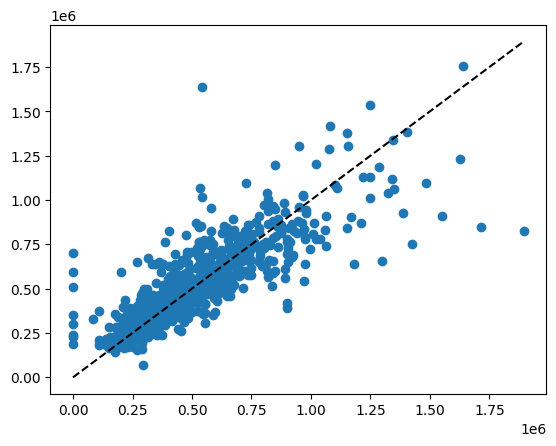

In [215]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_XGB_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'--',c='black')

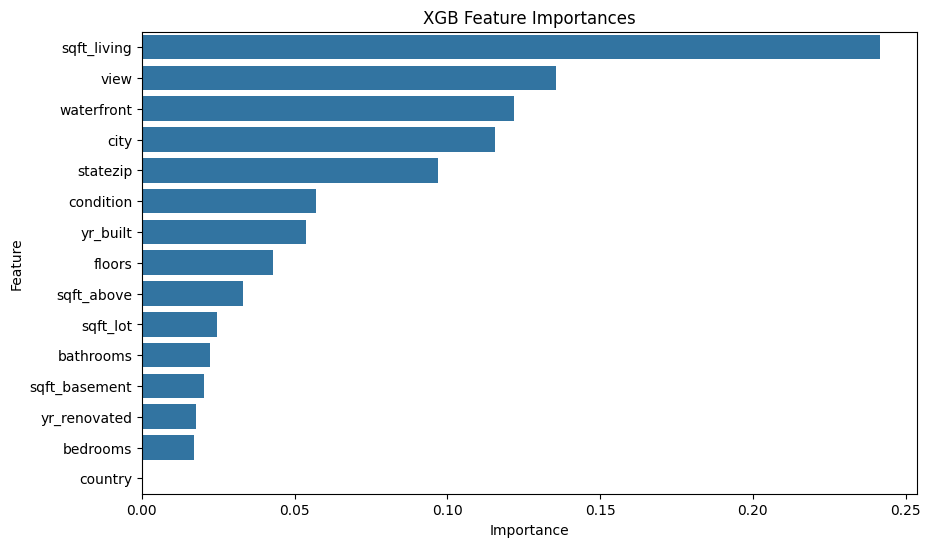

In [216]:
feature_importances = XGB.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGB Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Advertising Sales Dataset

In [217]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [218]:
! kaggle datasets download -d yasserh/advertising-sales-dataset

  0% 0.00/2.25k [00:00<?, ?B/s]
100% 2.25k/2.25k [00:00<00:00, 6.35MB/s]


In [219]:
! unzip advertising-sales-dataset.zip

Archive:  advertising-sales-dataset.zip
  inflating: Advertising Budget and Sales.csv  


In [220]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Advertising Budget and Sales.csv")
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## EXPLORE DATA

<Axes: >

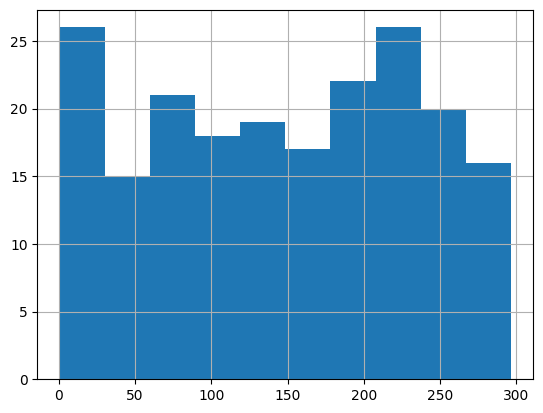

In [221]:
df['TV Ad Budget ($)'].hist()

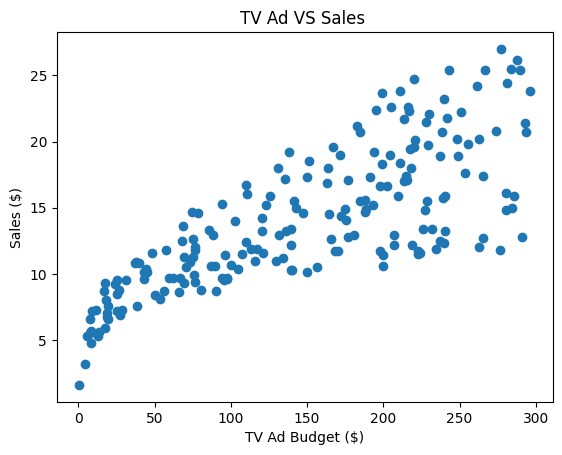

In [222]:
plt.scatter(x=df['TV Ad Budget ($)'],y=df['Sales ($)'])
plt.title('TV Ad VS Sales ')
plt.xlabel("TV Ad Budget ($)")
plt.ylabel("Sales ($)");

<Axes: >

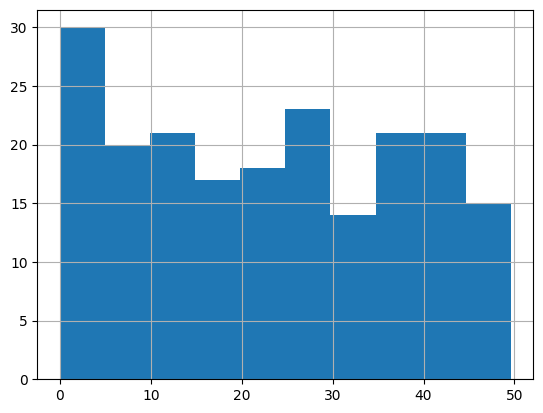

In [223]:
df['Radio Ad Budget ($)'].hist()

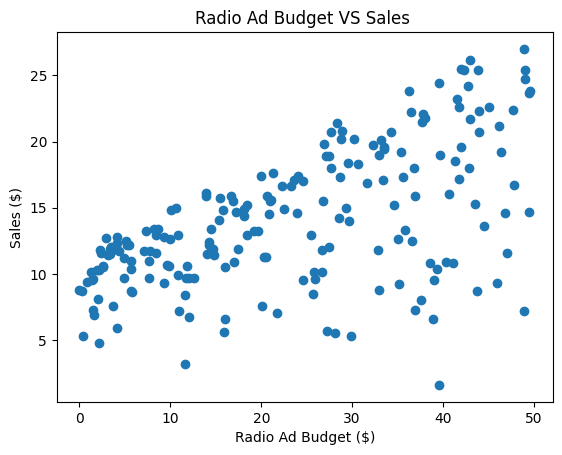

In [224]:
plt.scatter(x=df['Radio Ad Budget ($)'],y=df['Sales ($)'])
plt.title('Radio Ad Budget VS Sales ')
plt.xlabel("Radio Ad Budget ($)")
plt.ylabel("Sales ($)");

<Axes: >

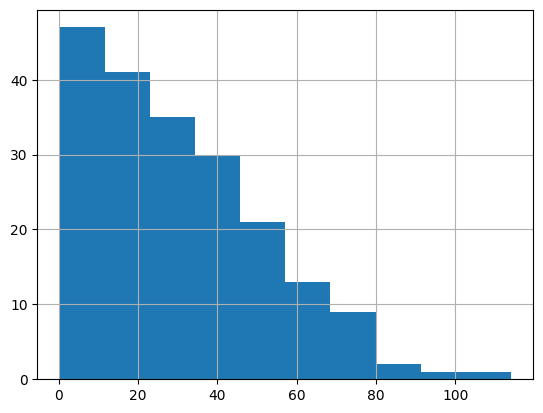

In [225]:
df['Newspaper Ad Budget ($)'].hist()

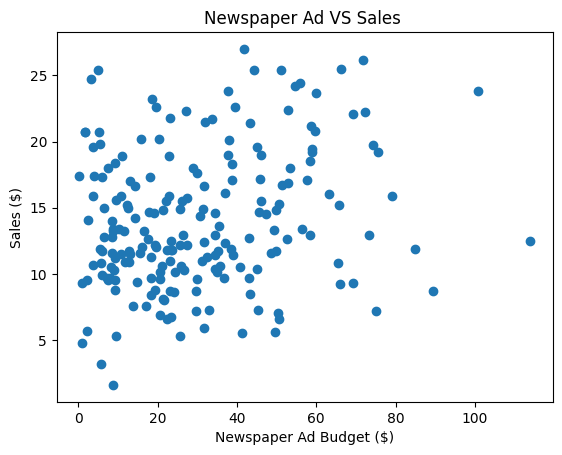

In [226]:

plt.scatter(x=df['Newspaper Ad Budget ($)'],y=df['Sales ($)'])
plt.title('Newspaper Ad VS Sales ')
plt.xlabel("Newspaper Ad Budget ($)")
plt.ylabel("Sales ($)");

## PREPARE DATA

In [227]:
df.drop(columns='Unnamed: 0',inplace=True)

## MODEL

In [228]:
target = 'Sales ($)'
X = df.drop(columns=target)
y = df[target]

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  =train_test_split(X,y,test_size = 0.2,random_state=6)

In [230]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [231]:
from sklearn.metrics import mean_absolute_error

print(f'mean_absolute_error of train dataset = {mean_absolute_error(y_train,y_pred_train)}')
print(f'mean_absolute_error of test dataset = {mean_absolute_error(y_test,y_pred_test)}')


mean_absolute_error of train dataset = 0.0010554692149162188
mean_absolute_error of test dataset = 0.6382111072540284


## COMMUINCATE

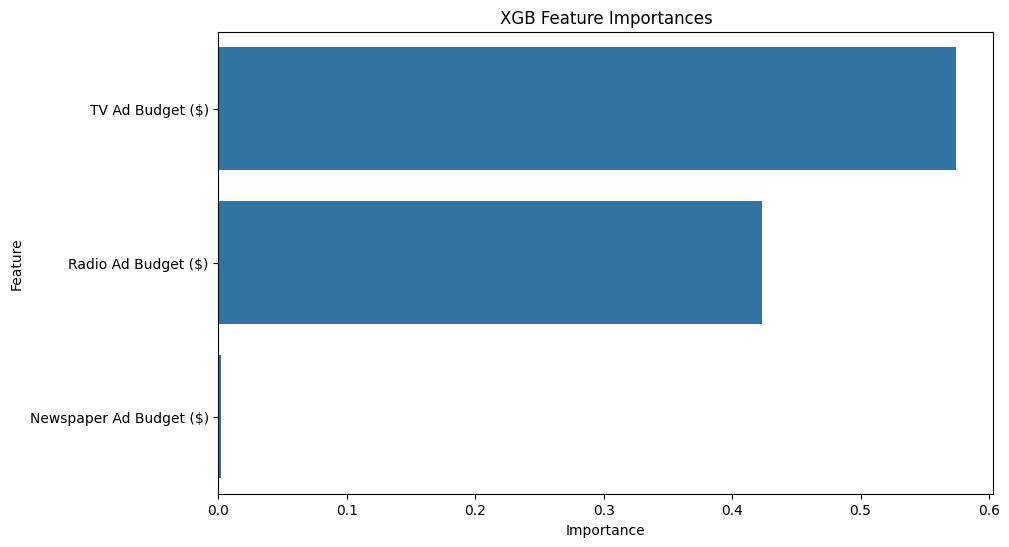

In [232]:
import seaborn as sns
feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGB Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [233]:
def pred_fun(TV,RADIO,NEWSPAPER,model):
  input = [[TV,RADIO,NEWSPAPER]]
  pred = model.predict(input)

  return pred

In [234]:
pred_fun(TV=1000,RADIO=100,NEWSPAPER=0,model =model)

array([26.739172], dtype=float32)

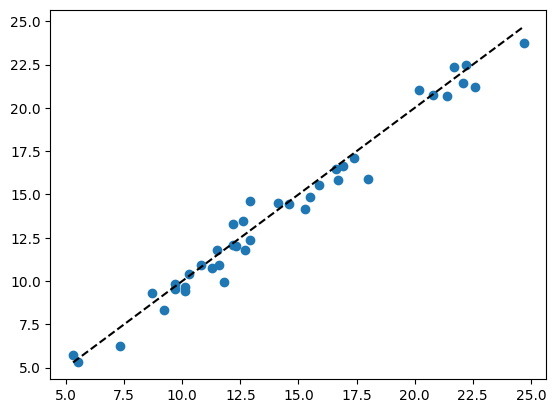

In [235]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'--',c='black')

Air Quality Data in India (2017 - 2022)

In [236]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00


In [237]:
# Import Libraries

import pandas as pd # for reading the data

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA # The Model
from pmdarima import auto_arima # For choosing the best parameter for the model
from sklearn.metrics import mean_absolute_error # for evaluation

In [238]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [239]:
! kaggle datasets download -d fedesoriano/air-quality-data-in-india

  0% 0.00/270k [00:00<?, ?B/s]
100% 270k/270k [00:00<00:00, 43.6MB/s]


In [240]:
! unzip /content/air-quality-data-in-india.zip

Archive:  /content/air-quality-data-in-india.zip
  inflating: air-quality-india.csv   


In [241]:
df = pd.read_csv("/content/air-quality-india.csv")

In [242]:
df.drop(columns=['Year',	'Month',	'Day'	,'Hour'],inplace=True)

In [243]:
df

,Timestamp,PM2.5
0,2017-11-07 12:00:00,64.51
1,2017-11-07 13:00:00,69.95
2,2017-11-07 14:00:00,92.79
3,2017-11-07 15:00:00,109.66
4,2017-11-07 16:00:00,116.50
...,...,...
36187,2022-06-04 11:00:00,35.89
36188,2022-06-04 12:00:00,33.83
36189,2022-06-04 13:00:00,33.05
36190,2022-06-04 14:00:00,35.29


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   PM2.5      36192 non-null  float64
dtypes: float64(1), object(1)
memory usage: 565.6+ KB


In [245]:
df['Timestamp']  = pd.to_datetime(df['Timestamp'] )

In [246]:
df.index = df['Timestamp']

In [247]:
df = df.resample('M').mean()

<ipython-input-247-03ea0f83093c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M').mean()


In [248]:
len(df) *0.8

44.800000000000004

In [249]:
df_train = df.iloc[:44]
df_test = df.iloc[44:]

In [250]:
stepwise =auto_arima(df_train,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=319.837, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=404.463, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=349.959, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=479.657, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=328.690, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=318.588, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=333.565, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=318.533, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=318.440, Time=0.12 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=320.382, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=320.372, Time=0.22 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=322.378, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=332.676, Time=0.08 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Tota

In [251]:
best_order = stepwise.get_params()['order']

In [252]:
best_order

(3, 0, 0)

In [253]:
model = ARIMA(df_train,order=best_order)

In [254]:
model = model.fit()

In [255]:
len(df_train)

44

In [256]:
len(df_test)

12

In [257]:
pred_train = model.predict(start=1,end=len(df_train))
pred_test =model.predict(start=len(df_train),end=(len(df_train) + len(df_test)-1))

# Evaluation

In [258]:
mean_absolute_error(df_train['PM2.5'],pred_train)

8.484561799377202

In [259]:
mean_absolute_error(df_test['PM2.5'],pred_test)

6.884951882651888

In [260]:
pred_train.index = df_train.index

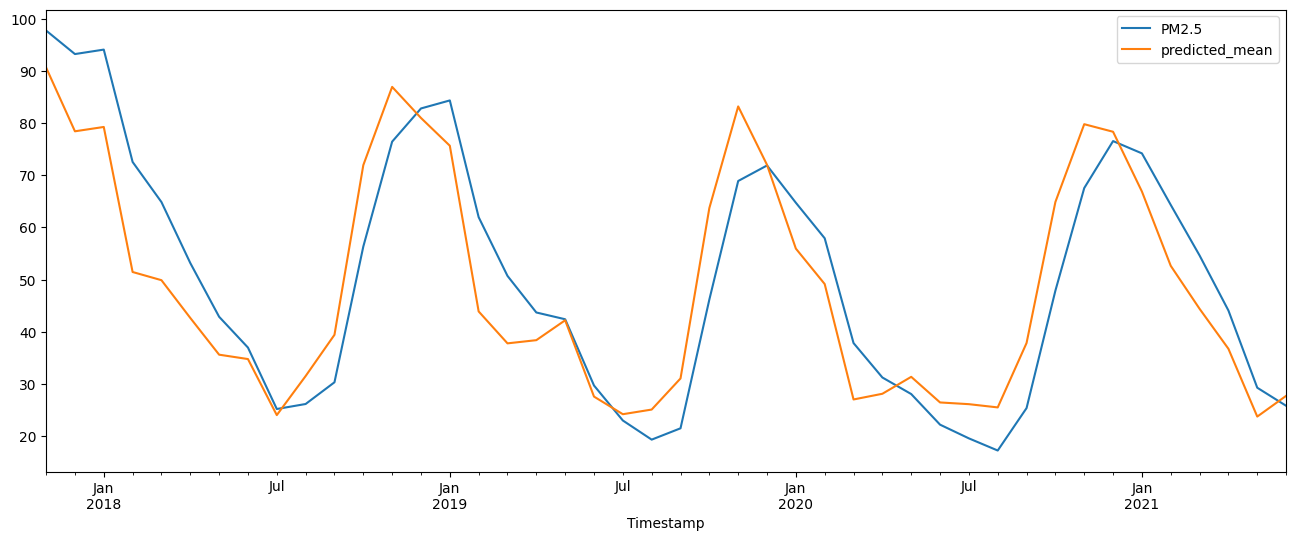

In [261]:
df_train['PM2.5'].plot(figsize=(16,6))
pred_train.plot(figsize=(16,6))
plt.legend()

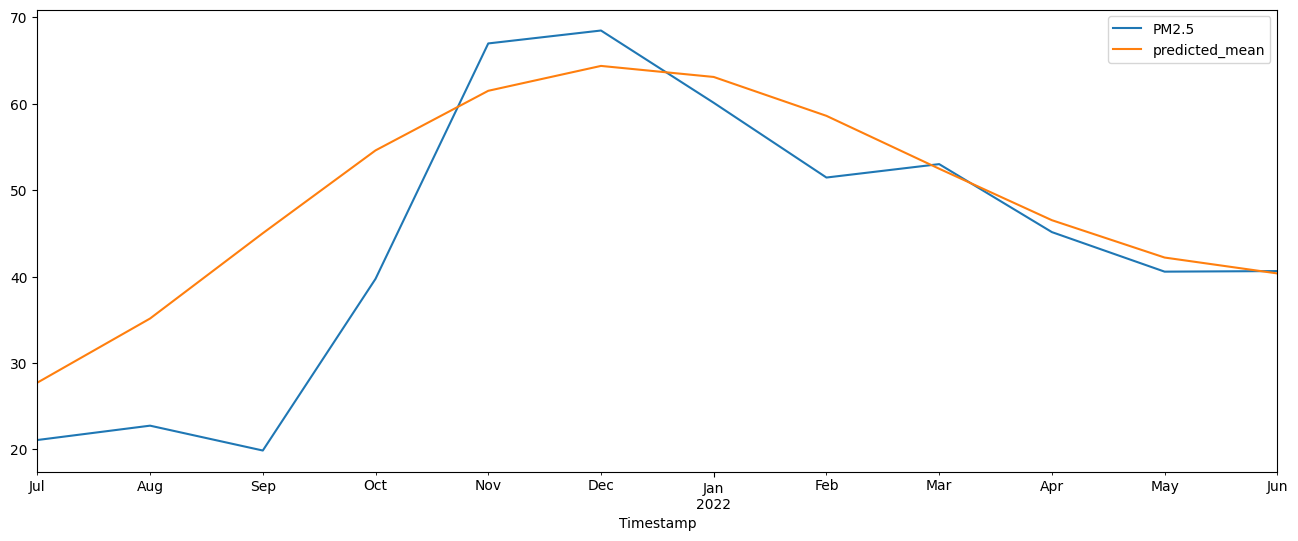

In [262]:
pred_test.index = df_test.index
df_test['PM2.5'].plot(figsize=(16,6))
pred_test.plot(figsize=(16,6))
plt.legend()

# Customer Segmentation

In [263]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [264]:
! kaggle datasets download -d vetrirah/customer

  0% 0.00/105k [00:00<?, ?B/s]
100% 105k/105k [00:00<00:00, 58.0MB/s]


In [265]:
! unzip customer.zip

Archive:  customer.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: sample_submission.csv   


In [266]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [267]:
df = pd.read_csv("Train.csv")

In [268]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [269]:
df.drop(columns=['ID','Var_1',	'Segmentation'],inplace=True)

In [270]:
df.dropna(inplace=True)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6718 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           6718 non-null   object 
 1   Ever_Married     6718 non-null   object 
 2   Age              6718 non-null   int64  
 3   Graduated        6718 non-null   object 
 4   Profession       6718 non-null   object 
 5   Work_Experience  6718 non-null   float64
 6   Spending_Score   6718 non-null   object 
 7   Family_Size      6718 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 472.4+ KB


# Explore

<Axes: >

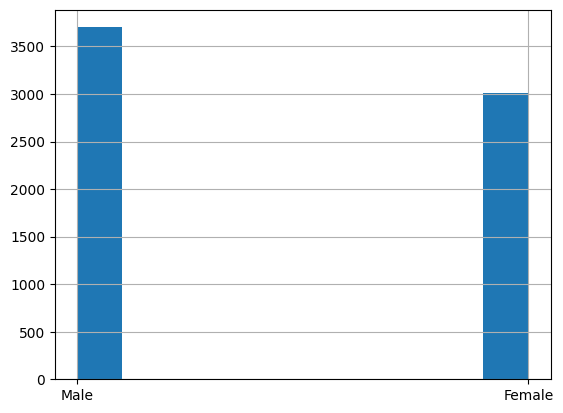

In [272]:
df.Gender.hist()

<Axes: >

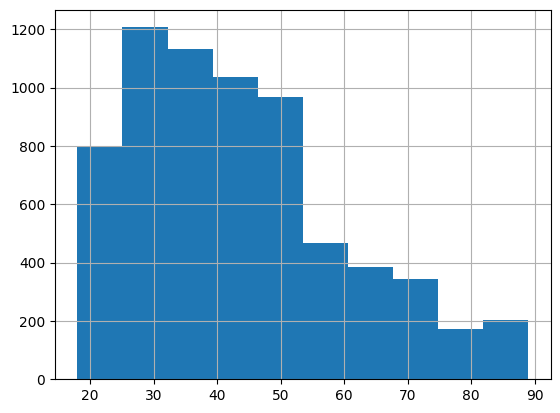

In [273]:
df.Age.hist()

<Axes: >

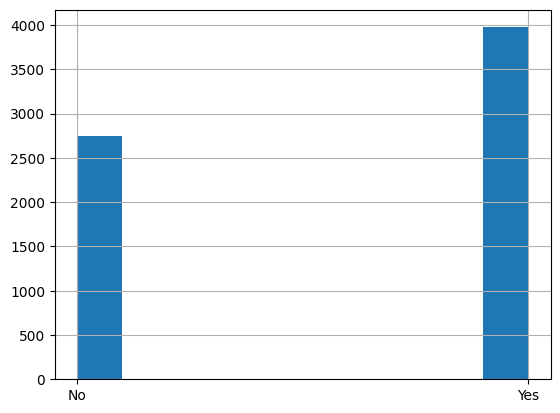

In [274]:
df.Ever_Married.hist()

<Axes: >

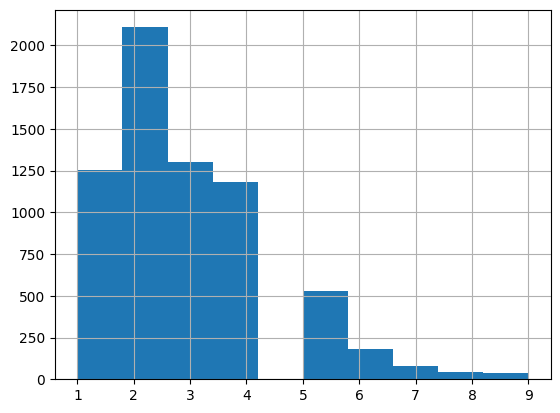

In [275]:
df.Family_Size.hist()

<Axes: >

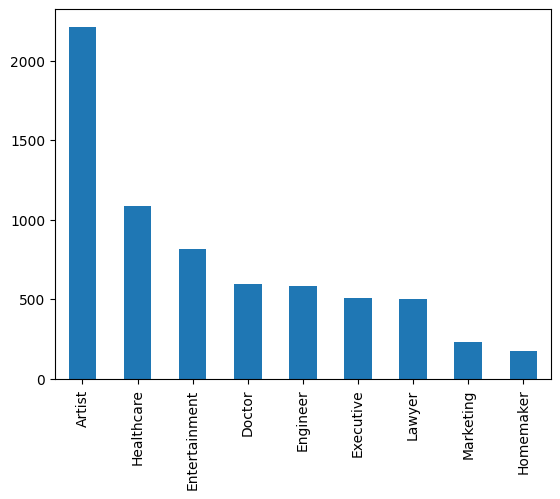

In [276]:
df.Profession.value_counts().plot(kind='bar')

<Axes: >

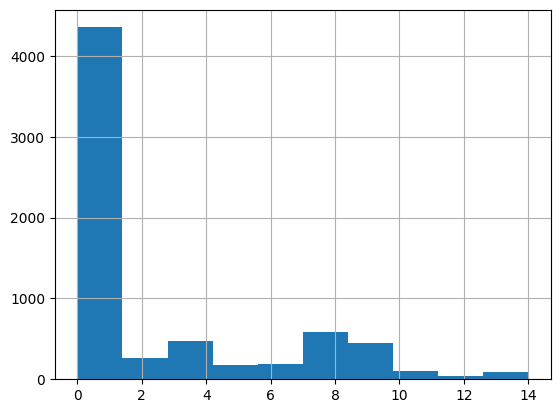

In [277]:
df.Work_Experience.hist()

<Axes: >

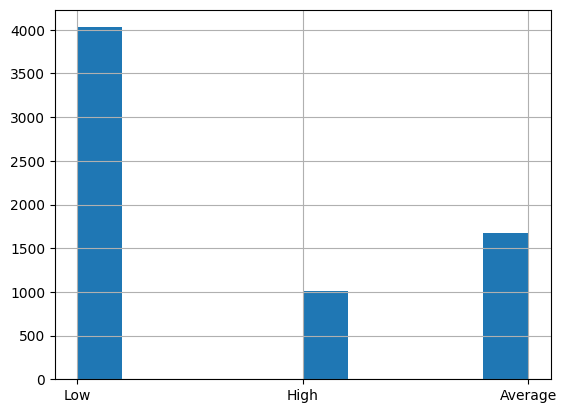

In [278]:
df.Spending_Score.hist()

# Prepare

In [279]:
X = df.copy()


In [280]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [281]:
X

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
5,Male,Yes,56,No,Artist,0.0,Average,2.0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [282]:
X['Gender']  = LE.fit_transform(X['Gender'] )
X['Ever_Married']  = LE.fit_transform(X['Ever_Married'] )
X['Graduated']  = LE.fit_transform(X['Graduated'] )
X['Profession']  = LE.fit_transform(X['Profession'] )
X['Spending_Score']  = LE.fit_transform(X['Spending_Score'] )

# Model

In [283]:
model = KMeans(n_clusters=9,random_state=42)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

In [284]:
labels = model.labels_

In [285]:
labels

array([7, 8, 8, ..., 3, 3, 2], dtype=int32)

In [286]:
len(X)

6718

In [287]:
df['Labels'] = labels

In [288]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Labels
0,Male,No,22,No,Healthcare,1.0,Low,4.0,7
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,8
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,8
5,Male,Yes,56,No,Artist,0.0,Average,2.0,0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,3


In [289]:
Intretia_error = model.inertia_

In [290]:
Intretia_error

131910.5870424225

In [291]:
n_clusters = range(3,15)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters :
    # bulid model
    model = KMeans(random_state=42,n_clusters=k)
    model.fit(X)
    # calculate inertia
    inertia_errors.append(model.inertia_)
    # calculate ss
    silhouette_scores.append(silhouette_score(X,model.labels_))

print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Inertia: [407734.0464649285, 283170.6267827406, 229887.31766907603, 197345.99788483314, 173036.9277828004, 151433.544420899, 131910.5870424225, 123310.03942134614, 116111.2687658087, 110820.38485307142, 105193.24588237965, 100923.52871979139]

Silhouette Scores: [0.45081746634929787, 0.4086282199740639, 0.3800673033235507, 0.3444286735231027, 0.3313643600815902, 0.3461899965630884, 0.3601535212942388, 0.36124511660792813, 0.33098867890197614, 0.3059222903734659, 0.29390467665471176, 0.2882720664752625]


Text(0, 0.5, 'inertia_errors')

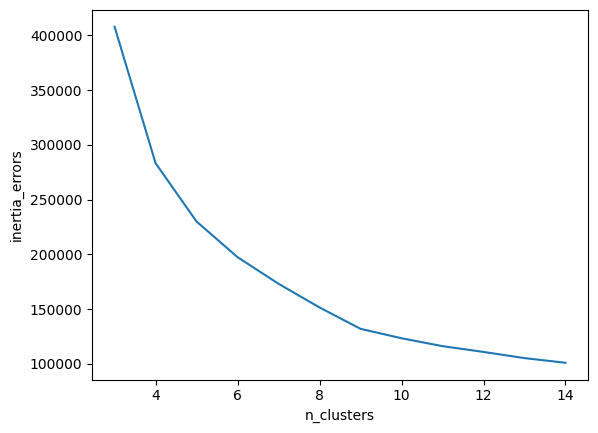

In [292]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters,inertia_errors)
plt.xlabel('n_clusters')
plt.ylabel('inertia_errors')

Text(0, 0.5, 'silhouette')

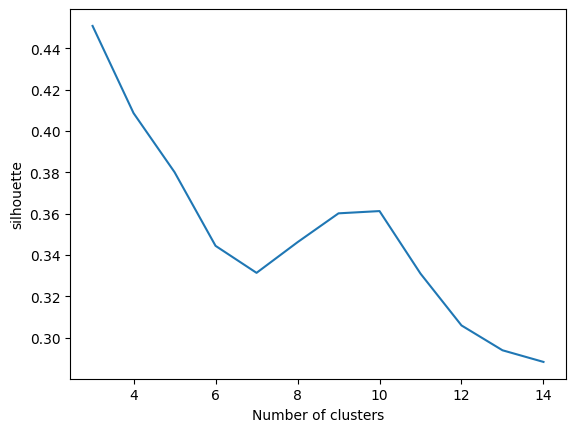

In [293]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters,silhouette_scores)
#plt.plot(n_clusters,inertia_errors)

plt.xlabel('Number of clusters')
plt.ylabel('silhouette')